In [358]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from math import cos, sin

%matplotlib notebook
%matplotlib inline

face3d = np.load('f3d_68_pts.npy')
print(face3d.shape)

(3, 68)


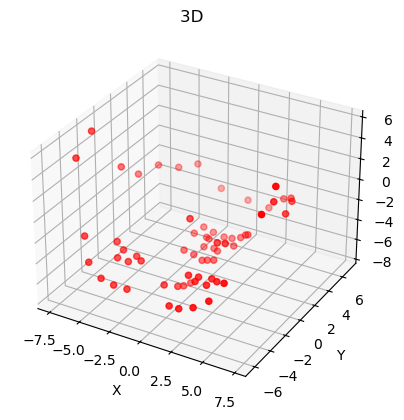

In [359]:
# TODO 1: Draw the 3D facial landmarks.
# enter your code here

#我的 %matplotlib notebook 無法執行，所以作業是以 %matplotlib inline 實作的。
#如果老師或助教無法執行 可以切換成 %matplotlib inline 看看。
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(face3d[0, :], face3d[1, :], face3d[2, :], c='r', marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('3D ')

plt.show()

In [360]:
# TODO 2: Computer the Euclidean distance between inner eyes.
# enter your code here
ineye1 = face3d[ : , 39 ]
ineye2 = face3d[ : , 42 ]

dis = np.sqrt(np.sum((ineye1 - ineye2)**2))
print(f"eculidean distance is  {dis:.2f}")

eculidean distance is  3.84


[[181.09036095 187.12003689 190.81523209 191.49931198 202.84926915
  216.74536496 237.66663451 266.84080216 315.4036478  365.22420259
  398.72623818 420.78072415 438.38061312 449.01281649 439.51681423
  451.32125304 457.20973611 190.51116812 202.35139248 226.08414585
  246.5413903  269.16182675 360.78831841 383.5210781  410.72938522
  434.32497581 446.7533533  315.28780531 321.33719239 314.93739951
  314.86844058 286.32542306 303.03482513 321.30865915 332.66760056
  349.79604713 220.59233735 227.80601616 249.10023085 271.5622786
  255.20211156 229.28790833 364.39784253 380.95505262 403.19500439
  417.99215833 402.74812653 380.43610818 261.37424614 275.51297092
  303.04824561 321.30743339 332.64799463 360.21372944 380.12001088
  360.09875063 338.60439757 321.30518893 298.00487437 281.58012487
  261.37424614 298.11863107 321.2972951  338.47192695 375.49633389
  338.47192695 321.2972951  303.2420876 ]
 [171.48365098 207.02482388 241.04700055 274.71399103 312.11316326
  345.43780974 369.13

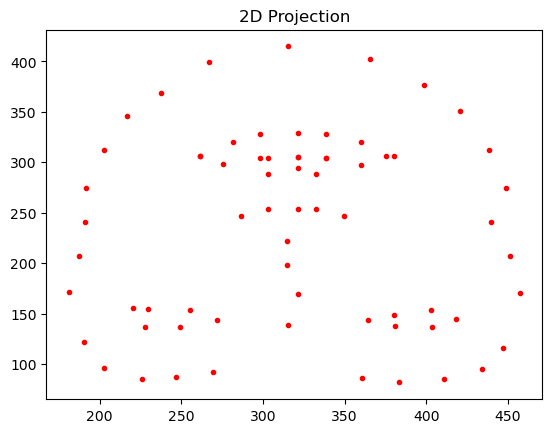

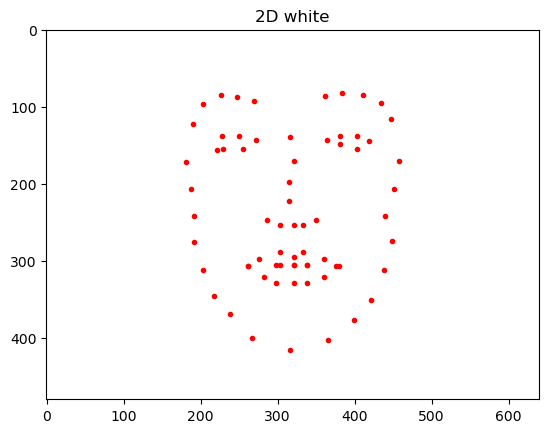

In [361]:
# TODO 3: 3D-to-2D Projection.
# Step 3.1: Construct the intrinsic matrix K.
# Step 3.2: Contruct the extrinsic matrix [R,t].
# Step 3.3: Construct the 2D projection matrix m.
# Step 3.4: Plot matrix m.
# Step 3.5: Plot matrix m with imshow.
# enter your code here

#3.1
k=np.array([[640, 0, 320],[0, 640, 240],[0, 0, 1]])

#3.2
R=np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
t=np.array([[0, 0, 30]]).T

#3.3
m = np.zeros((2, 68))
# M = face3d
Mi = np.vstack((face3d, np.ones(68)))

#print(Mi)
mm = k @ np.hstack((R, t)) @ Mi
# mm=[m1,m2,m3] , m=[[m1/m3][m2/m3]]
#print(mm)
mm = mm / mm[2]
#print(mm)

m[0] = mm[0]
m[1] = mm[1]

print(m)

#ˇ3.4
plt.figure()
plt.plot(m[0, :], m[1, :], 'r.')
plt.title('2D Projection')

plt.show()

#3.5
plt.figure()
white_image = np.full((480, 640, 3), 255)

plt.imshow(white_image)
plt.plot(m[0, :], m[1, :], 'r.')
plt.title('2D white')
plt.show()



In [362]:
# Question 1: Why is the orientation of the face in Figure 2 different from that in Figure 3?
# enter your answer here
#如果仔細看2張圖片的座標的話，會發現兩張人臉的寬度以及高度是一樣的。
#唯一不一樣的是尺度，Figure 2的寬度比例尺較大，看起來會比較大。
#Figure 3的寬度比例尺較小，而高度比例尺沒怎麼變，所以看起來比較小比較瘦。
#而後imshow會將y軸的0從左下角轉移到左上角，所以看起來或是上下顛倒的。

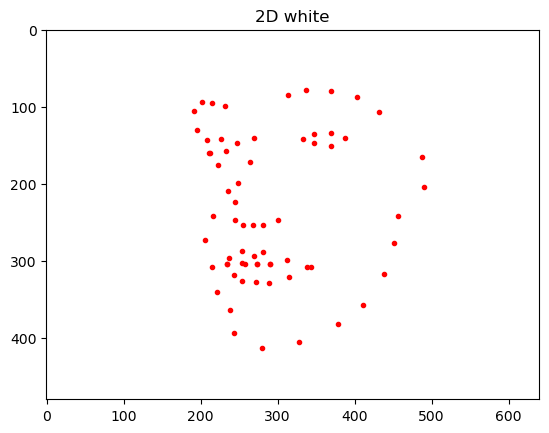

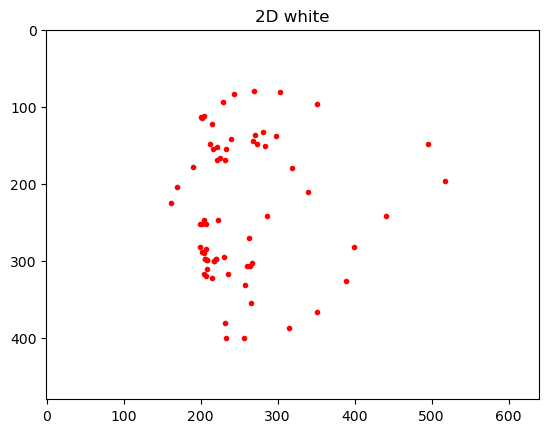

In [363]:
# TODO 4: Repeat Steps 3.1, 3.2, 3.3, 3.5 with different rotation matrices.
# enter your code here
import numpy as np
from math import cos, sin, radians

A = radians(0)

B = radians(20)

r = radians(0)

R_x = np.array([[1, 0, 0],
                [0, cos(A), -sin(A)],
                [0, sin(A), cos(A)]])

R_y = np.array([[cos(B), 0, sin(B)],
                [0, 1, 0],
                [-sin(B), 0, cos(B)]])

R_z = np.array([[cos(r), -sin(r), 0],
                [sin(r), cos(r), 0],
                [0, 0, 1]])

R = R_z @ R_y @ R_x

#3.1
k=np.array([[640, 0, 320],[0, 640, 240],[0, 0, 1]])

#3.2
#R=np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
#rr=np.array([[0, 0, -1],[0, 1, 0],[-1, 0, 0]])
t=np.array([[0, 0, 30]]).T

#3.3
m = np.zeros((2, 68))
# M = face3d
Mi = np.vstack((face3d, np.ones(68)))

#print(Mi)
mm = k @ np.hstack((R, t)) @ Mi
# mm=[m1,m2,m3] , m=[[m1/m3][m2/m3]]
#print(mm)
mm = mm / mm[2]
#print(mm)

m[0] = mm[0]
m[1] = mm[1]

#print(m)

##ˇ3.4
#plt.figure()
#plt.plot(m[0, :], m[1, :], 'r.')
#plt.title('2D Projection')
#
#plt.show()

#3.5
plt.figure()
white_image = np.full((480, 640, 3), 255)

plt.imshow(white_image)
plt.plot(m[0, :], m[1, :], 'r.')
plt.title('2D white')
plt.show()





A = radians(0)

B = radians(60)

r = radians(0)

R_x = np.array([[1, 0, 0],
                [0, cos(A), -sin(A)],
                [0, sin(A), cos(A)]])

R_y = np.array([[cos(B), 0, sin(B)],
                [0, 1, 0],
                [-sin(B), 0, cos(B)]])

R_z = np.array([[cos(r), -sin(r), 0],
                [sin(r), cos(r), 0],
                [0, 0, 1]])

R = R_z @ R_y @ R_x

R = R_z @ R_y @ R_x

#3.1
k=np.array([[640, 0, 320],[0, 640, 240],[0, 0, 1]])

#3.2
#R=np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
#rr=np.array([[0, 0, -1],[0, 1, 0],[-1, 0, 0]])
t=np.array([[0, 0, 30]]).T

#3.3
m = np.zeros((2, 68))
# M = face3d
Mi = np.vstack((face3d, np.ones(68)))

#print(Mi)
mm = k @ np.hstack((R, t)) @ Mi
# mm=[m1,m2,m3] , m=[[m1/m3][m2/m3]]
#print(mm)
mm = mm / mm[2]
#print(mm)

m[0] = mm[0]
m[1] = mm[1]

#print(m)

##ˇ3.4
#plt.figure()
#plt.plot(m[0, :], m[1, :], 'r.')
#plt.title('2D Projection')
#
#plt.show()

#3.5
plt.figure()
white_image = np.full((480, 640, 3), 255)

plt.imshow(white_image)
plt.plot(m[0, :], m[1, :], 'r.')
plt.title('2D white')
plt.show()




<function matplotlib.pyplot.show(close=None, block=None)>

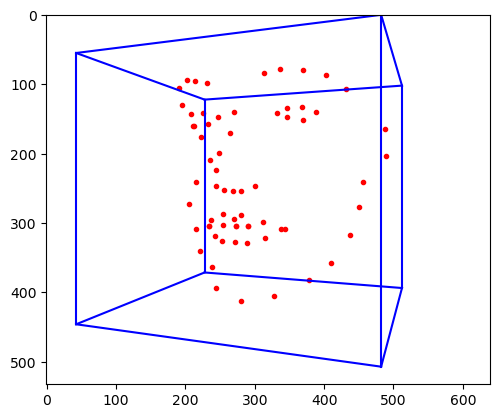

In [364]:
# TODO 5: Augmented Reality
# Step 5.1: Construct the eight vertices of the cube containing the 3D facial landmarks
# Step 5.2: Follow TODO 4 to project the 3D facial landmarks and the eight vertices of the cube onto the 2D space.
# enter your code here

#5.1
x_min = np.min(face3d[0, :]) - 1
x_max = np.max(face3d[0, :]) + 1
y_min = np.min(face3d[1, :]) - 1
y_max = np.max(face3d[1, :]) + 1
z_min = np.min(face3d[2, :]) - 1
z_max = np.max(face3d[2, :]) + 1

cube = np.array([[x_min, y_min, z_min],
                 [x_max, y_min, z_min],
                 [x_max, y_max, z_min],
                 [x_min, y_max, z_min],
                 [x_min, y_min, z_max],
                 [x_max, y_min, z_max],
                 [x_max, y_max, z_max],
                 [x_min, y_max, z_max]])


#5.2
B=radians(20)
R_y = np.array([[cos(B), 0, sin(B)],
                [0, 1, 0],
                [-sin(B), 0, cos(B)]])

m = np.zeros((2, 68+8))

f3d_and_vertic =  np.hstack((face3d, cube.T ))

Mi = np.vstack((f3d_and_vertic, np.ones(76)))

#print(k)
#print(np.hstack((R_y, t)))
#print(Mi)
mm = k @ np.hstack((R_y, t)) @ Mi

mm = mm / mm[2]
#print(mm)

m[0] = mm[0]
m[1] = mm[1]


white_image = np.full((480, 640, 3), 255)
plt.figure()
plt.imshow(white_image)

plt.plot(m[0, 0:67], m[1, 0:67], 'r.')
#plt.plot(m[0, 68:76], m[1, 68:76], 'b-')
#plt.plot(m[0, 68:72], m[1, 68:72], 'b-')
#plt.plot(m[0, 68:70], m[1, 68:70], 'g-')

#plt.plot(m[0, 72:76], m[1, 72:76], 'b-')


cube_edges = [[0, 1], [1, 2], [2, 3], [3, 0],  
              [4, 5], [5, 6], [6, 7], [7, 4],  
              [0, 4], [1, 5], [2, 6], [3, 7]]  

for edge in cube_edges:
    p1 = m[:, 68+edge[0]]
    p2 = m[:, 68+edge[1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-')

plt.show